# ![](https://upload.wikimedia.org/wikipedia/commons/2/24/Bellabeatlogo.png)

## **Introduction**

Bellabeat, a high-tech manufacturer of health-focused products for women, wants to analyze smart device data to identify trends and gain insights on how the company can improve her app, which provides data related to activity, sleep, stress, menstrual cycle, and mindfulness habits so users can better understand their habits and make healthy decisions. Using the information gained through this analysis, we will gather suggestions on how Bellabeat can help its users better understand their habits and make healthy decisions.

## **Key Questions to be Answered**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## **Prepare**

**About the Data**

FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

**Setting Up Enviroment**

In [1]:
library(ggpubr)
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)
library(ggplot2)
library(ggthemes)


Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**Loading Data**

For my analysis, I will be using these three data sets as I am more interested in a high level overview of the current fitness watch industry. When I first started doing my analysis, I was getting too deep in the health aspects of the data rather than how users are interacting with fitness watches. In this case study I tried to put my focus on the different user segments I created to better understand how bella beat should be marketing their products.



In [2]:
daily_activity<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_loss<-read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")





Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 413 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 67 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport


ℹ Use `spec()` to retrieve the full column specific

In [3]:
head(daily_activity)
head(daily_sleep)
head(weight_loss)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Initial observations of these three data frames:
1. They all share a common primary key: Id
2. The date column across all three data frames are different and will need to be cleaned to be consistent for when we merge them.


In [4]:
n_distinct(daily_activity)
n_distinct(daily_sleep)
n_distinct(weight_loss)

[1] 940

[1] 410

[1] 67

Daily Activity has the most distinct records while the weight loss data frame as the least.

In [5]:
n_unique(daily_activity$Id)
n_unique(daily_sleep$Id)
n_unique(weight_loss$Id)

[1] 33

[1] 24

[1] 8


There are 33 distinct user ids in the daily activity, 24 in the daily sleep data frame and only 8 users in the weight loss data frame. My initial observations are that users tend not to log extra activities like weight and sleep and rely more on the automatic features like steps and calories burned throughout the day. 


In [6]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(weight_loss))

[1] 0

[1] 3

[1] 0

Before I start analyzing, I want to make sure we are not working with duplicate data in our data frames. The daily sleep data frame has 3 duplicate entries so before I drop those from the data frame I want to see which rows are duplicates. Below we can see that users with ids 4388161847,4702921684,8378563200 contain duplicated sleep records. I went ahead and drops those records so we are only left with unique rows in our data frames

In [7]:
daily_sleep[duplicated(daily_sleep)|duplicated(daily_sleep, fromLast=TRUE),]

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
4388161847,5/5/2016 12:00:00 AM,1,471,495
4388161847,5/5/2016 12:00:00 AM,1,471,495
4702921684,5/7/2016 12:00:00 AM,1,520,543
4702921684,5/7/2016 12:00:00 AM,1,520,543
8378563200,4/25/2016 12:00:00 AM,1,388,402
8378563200,4/25/2016 12:00:00 AM,1,388,402


In [8]:
daily_sleep<-daily_sleep %>%
distinct()
sum(duplicated(daily_sleep))


[1] 0

## Cleaning up data frames

To tidy up our data frames even more, I went ahead and used the clean_names() function from the janitor package to snake_case all our column names and make them lower case for consistency across all our data frames. I then added 2 columns to the sleep data frame to convert minutes to hours for times asleep and time in bed.

In [9]:
daily_activity<-clean_names(daily_activity)
daily_sleep<-clean_names(daily_sleep)
weight_loss <-clean_names(weight_loss)

In [10]:
daily_sleep<-daily_sleep%>%
  mutate(total_hours_slept =total_minutes_asleep/60,total_hours_in_bed =total_time_in_bed/60)

In [11]:
daily_sleep$total_hours_slept=round(daily_sleep$total_hours_slept,2)
daily_sleep$total_hours_in_bed=round(daily_sleep$total_hours_in_bed,2)

In [12]:
head(daily_sleep)

id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_hours_slept,total_hours_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346,5.45,5.77
1503960366,4/13/2016 12:00:00 AM,2,384,407,6.40,6.78
1503960366,4/15/2016 12:00:00 AM,1,412,442,6.87,7.37
1503960366,4/16/2016 12:00:00 AM,2,340,367,5.67,6.12
1503960366,4/17/2016 12:00:00 AM,1,700,712,11.67,11.87
1503960366,4/19/2016 12:00:00 AM,1,304,320,5.07,5.33


In order to merge the daily activity and sleep data frame, I converted both data columns from characters to dates and format them as Year/Month/Day. I also created a consistent column name date between the two data frames. Doing this will allow us to merge these data frames on the id and date column.

In [13]:
daily_sleep_cleaned<-daily_sleep%>%
  rename(date = sleep_day) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))
daily_activity_cleaned<-daily_activity%>%
  rename(date = activity_date) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

In [14]:
head(daily_sleep_cleaned)
head(daily_activity_cleaned)

id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_hours_slept,total_hours_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346,5.45,5.77
1503960366,2016-04-13,2,384,407,6.40,6.78
1503960366,2016-04-15,1,412,442,6.87,7.37
1503960366,2016-04-16,2,340,367,5.67,6.12
1503960366,2016-04-17,1,700,712,11.67,11.87
1503960366,2016-04-19,1,304,320,5.07,5.33


id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Merging sleep and daily activity on id and date

In [15]:
daily_data <-merge(daily_activity_cleaned,daily_sleep_cleaned,by=c("id","date"))

Below is our data frame names daily_data which we will be using for the bulk of our analysis

In [16]:
head(daily_data)
sum(duplicated(daily_data))

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_hours_slept,total_hours_in_bed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,5.45,5.77
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,6.40,6.78
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,6.87,7.37
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,5.67,6.12
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,11.67,11.87
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,5.07,5.33


[1] 0

## Analyize and Share


In [17]:
daily_data %>%
select(total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_hours_slept)%>%
summary()

  total_steps    total_distance   very_active_minutes fairly_active_minutes
 Min.   :   17   Min.   : 0.010   Min.   :  0.00      Min.   :  0.00       
 1st Qu.: 5189   1st Qu.: 3.592   1st Qu.:  0.00      1st Qu.:  0.00       
 Median : 8913   Median : 6.270   Median :  9.00      Median : 11.00       
 Mean   : 8515   Mean   : 6.012   Mean   : 25.05      Mean   : 17.92       
 3rd Qu.:11370   3rd Qu.: 8.005   3rd Qu.: 38.00      3rd Qu.: 26.75       
 Max.   :22770   Max.   :17.540   Max.   :210.00      Max.   :143.00       
 lightly_active_minutes sedentary_minutes    calories    total_hours_slept
 Min.   :  2.0          Min.   :   0.0    Min.   : 257   Min.   : 0.970   
 1st Qu.:158.0          1st Qu.: 631.2    1st Qu.:1841   1st Qu.: 6.020   
 Median :208.0          Median : 717.0    Median :2207   Median : 7.210   
 Mean   :216.5          Mean   : 712.1    Mean   :2389   Mean   : 6.987   
 3rd Qu.:263.0          3rd Qu.: 782.8    3rd Qu.:2920   3rd Qu.: 8.170   
 Max.   :518.0    

Interesting Observations
1. There is a high average of sedentary minutes across users.
1. We see a wide range of activity minutes across all 4 of our intensities


I want to dig deep into the different activity minutes across the users to better understand how users are spending the day with their devices. 

In [18]:
total<-sum(daily_data$sedentary_minutes,daily_data$lightly_active_minutes,daily_data$fairly_active_minutes,daily_data$very_active_minutes)
sedentary<-sum(daily_data$sedentary_minutes)
light <-sum(daily_data$lightly_active_minutes)
fairly <-sum(daily_data$fairly_active_minutes)
very <-sum(daily_data$very_active_minutes)
percent<-c(sedentary/total*100,light/total*100,fairly/total*100,very/total*100)
activity_level<-c("sedentary","light","fairly",'active')
level<-data.frame(activity_level,percent)
View(level)

activity_level,percent
<chr>,<dbl>
sedentary,73.290558
light,22.286820
fairly,1.844809
active,2.577813


From the data frame above, we see that out of all total minutes across users devices, 73% of minutes are classified as sedentary while only 2% of all minutes are considered very active! This is very interesting given that this is a fitness device meant to track fitness activities. From this we can see that a majority of users wearing these fitness devices are doing so in a low activity level way. 

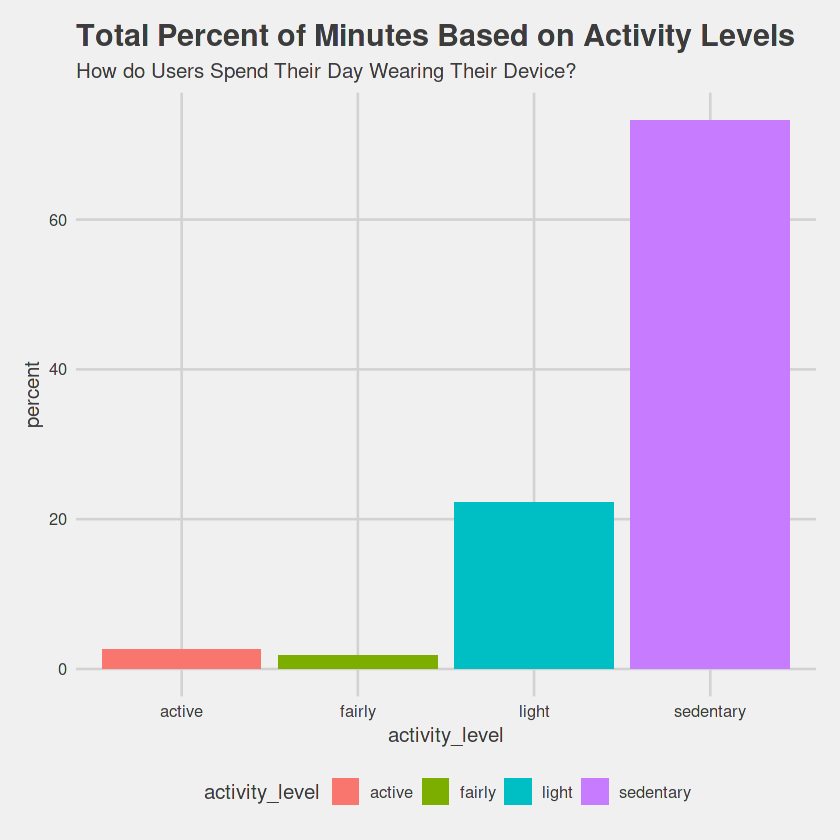

In [19]:
ggplot(data=level,mapping=aes(x=activity_level,y=percent,fill=activity_level))+geom_bar(stat="identity")+labs(title="Total Percent of Minutes Based on Activity Levels",subtitle = "How do Users Spend Their Day Wearing Their Device?")+theme_fivethirtyeight()+theme(axis.title=element_text())


To better understand our user type, I classified users into three categories: sedentary,lightly active and very active based on how they fall above or below mean activity levels. 


In [20]:
user_type <-daily_data%>%
  mutate(user_type=case_when(sedentary_minutes>mean(sedentary_minutes) 
                             & lightly_active_minutes < mean(lightly_active_minutes) 
                             & very_active_minutes<mean(very_active_minutes)~"sedentary",
                             
                             sedentary_minutes < mean(sedentary_minutes)
                             & lightly_active_minutes >mean(lightly_active_minutes)
                            &very_active_minutes<mean(very_active_minutes)~"lightly active",
                            
                             sedentary_minutes<mean(sedentary_minutes)
                             &lightly_active_minutes>mean(lightly_active_minutes)
                             &very_active_minutes>mean(very_active_minutes)~"very active"))%>%
  drop_na()
head(user_type)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_hours_slept,total_hours_in_bed,user_type
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2016-04-21,9819,6.34,6.34,0,1.34,0.35,4.65,0,⋯,8,211,838,1775,1,325,364,5.42,6.07,sedentary
2,1503960366,2016-04-24,10039,6.41,6.41,0,2.92,0.21,3.28,0,⋯,5,238,709,1788,1,430,449,7.17,7.48,very active
3,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,⋯,34,217,712,1947,1,404,425,6.73,7.08,very active
4,1503960366,2016-05-11,12770,8.13,8.13,0,2.56,1.01,4.55,0,⋯,23,251,669,1783,1,285,306,4.75,5.10,very active
5,1644430081,2016-04-29,3176,2.31,2.31,0,0.00,0.00,2.31,0,⋯,0,120,1193,2498,1,119,127,1.98,2.12,sedentary
6,1927972279,2016-04-12,678,0.47,0.47,0,0.00,0.00,0.47,0,⋯,0,55,734,2220,3,750,775,12.50,12.92,sedentary


In [21]:
user_breakdown<-user_type%>%
  select(user_type)%>%
  group_by(user_type)%>%
  count()
head(user_breakdown)

user_type,n
<chr>,<int>
lightly active,85
sedentary,75
very active,26


After splitting our users into three groups, we see that a majority of users are in the sedentary and lightly active group. These user breakdowns will be useful during our visualizations later on. 


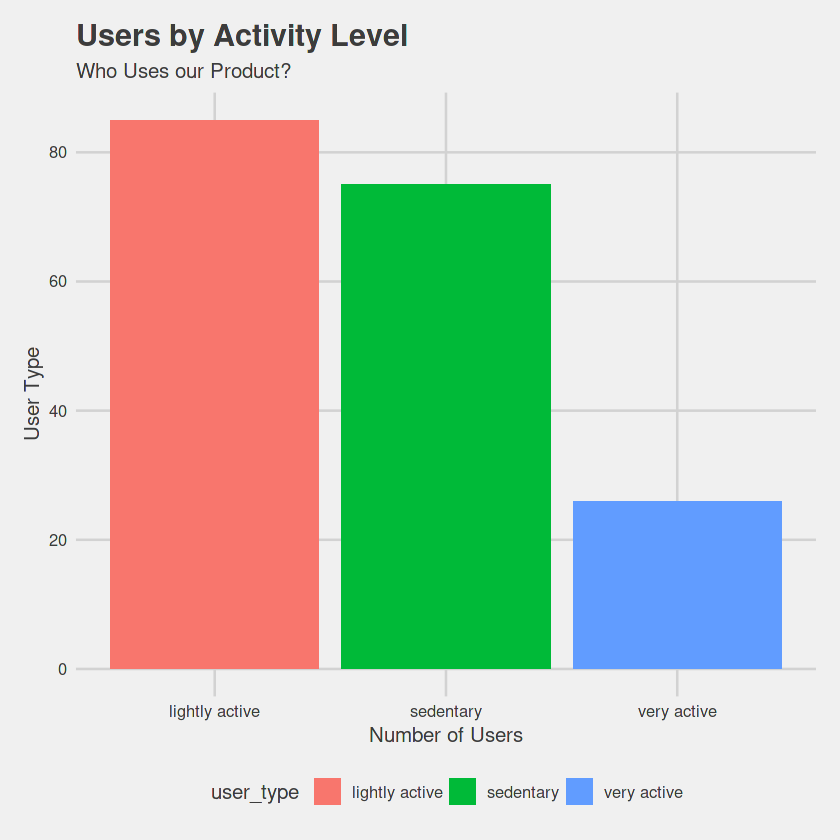

In [22]:
ggplot(data=user_breakdown) +geom_bar(mapping=aes(x=user_type,y=n,fill=user_type),stat="identity")+labs(title = "Users by Activity Level",subtitle = "Who Uses our Product?",x="Number of Users",y="User Type")+theme_fivethirtyeight()+theme(axis.title=element_text())



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



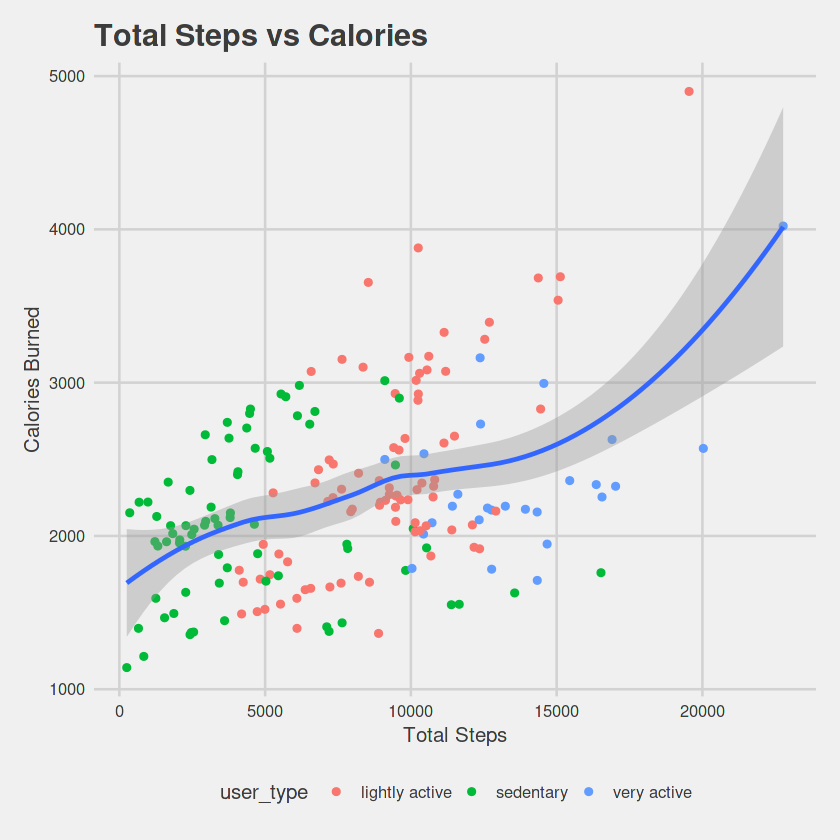

In [23]:
ggplot(data=user_type)+geom_point(mapping=aes(x=total_steps,y=calories,color=user_type))+geom_smooth((mapping=aes(x=total_steps,y=calories)))+labs(title="Total Steps vs Calories",x="Total Steps",y="Calories Burned")+theme_fivethirtyeight()+theme(axis.title=element_text())

We see a positive correlation between total steps taken and calories burned for users. Users who are identified as sedentary are seen having less steps taken per day as well as less calories burned than users who are in the lightly active and very active group. Something interesting to note is that there is less of a difference between the very active and lightly active group. This could mean that users who are more active throughout the day are actually walking more and burning more then users who are only very active in a short amount of time. 


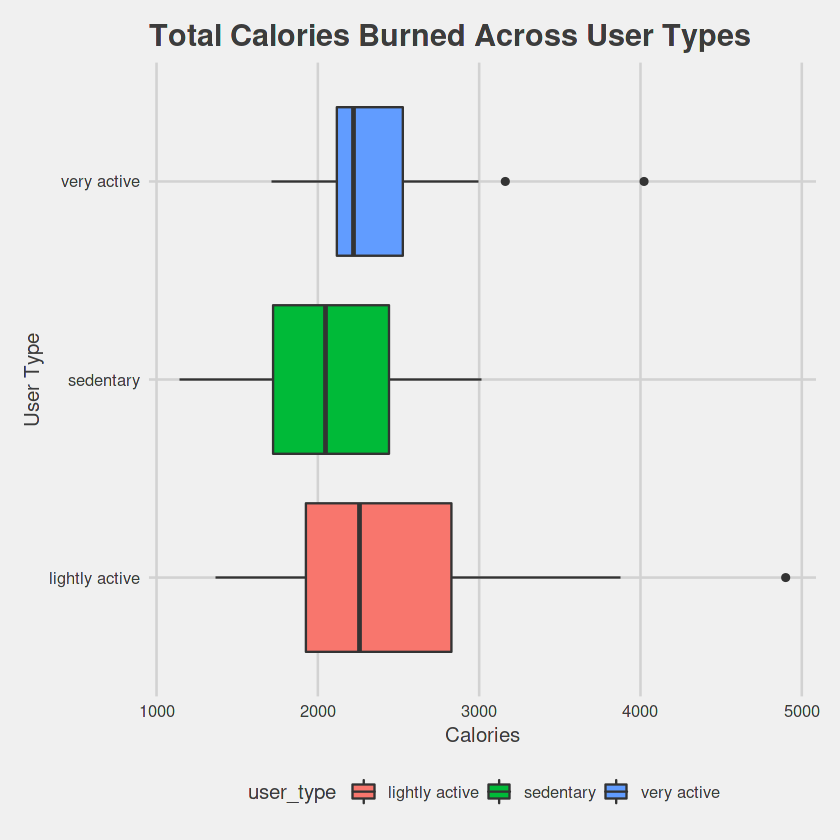

In [24]:
ggplot(data=user_type)+geom_boxplot(mapping=aes(x=calories,y=user_type,fill=user_type))+theme_fivethirtyeight()+theme(axis.title=element_text())+labs(title="Total Calories Burned Across User Types",x="Calories",y="User Type")

In this box plot sedentary users have the lowest median calories burned compaired to the other users. While very active users then to have more calories burned then lightly active users, the medians are very simular between the two groups. 

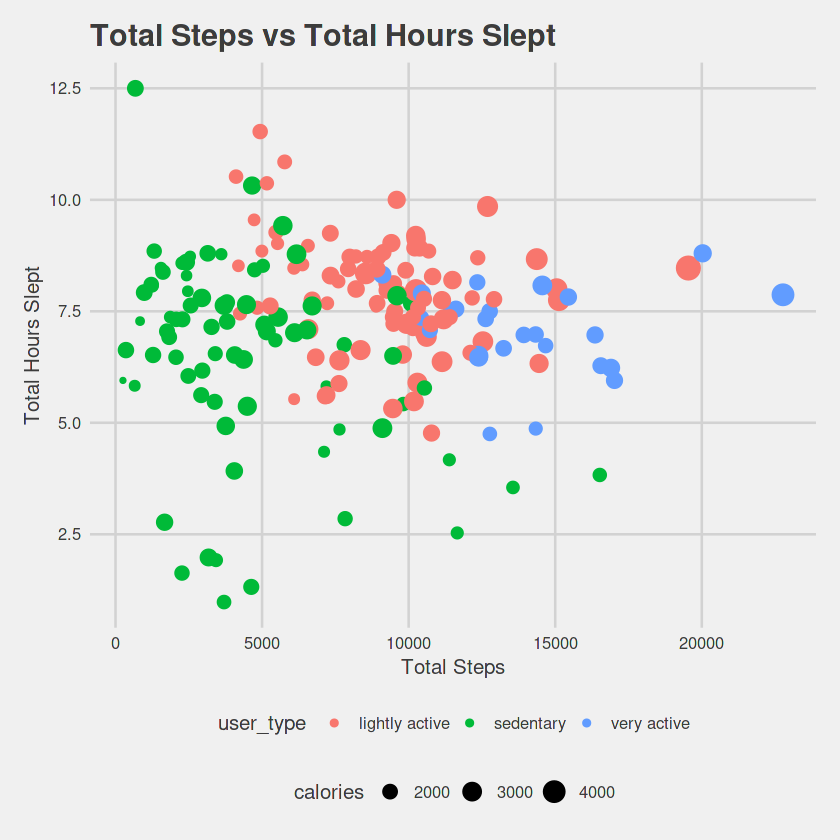

In [25]:
ggplot(data=user_type)+geom_point(mapping=aes(x=total_steps,y=total_hours_slept,color=user_type,size=calories))+theme_fivethirtyeight()+theme(axis.title=element_text())+labs(title="Total Steps vs Total Hours Slept",x="Total Steps",y="Total Hours Slept")

This chart compares the relationship between steps, hours slept and calories burned. Sedentary users are shown having the lowest amount of hours slept where more active users are seen sleeping more. We see users who sleep around 8 hours and walk at least 10,000 steps burn more calories than users who don't. 


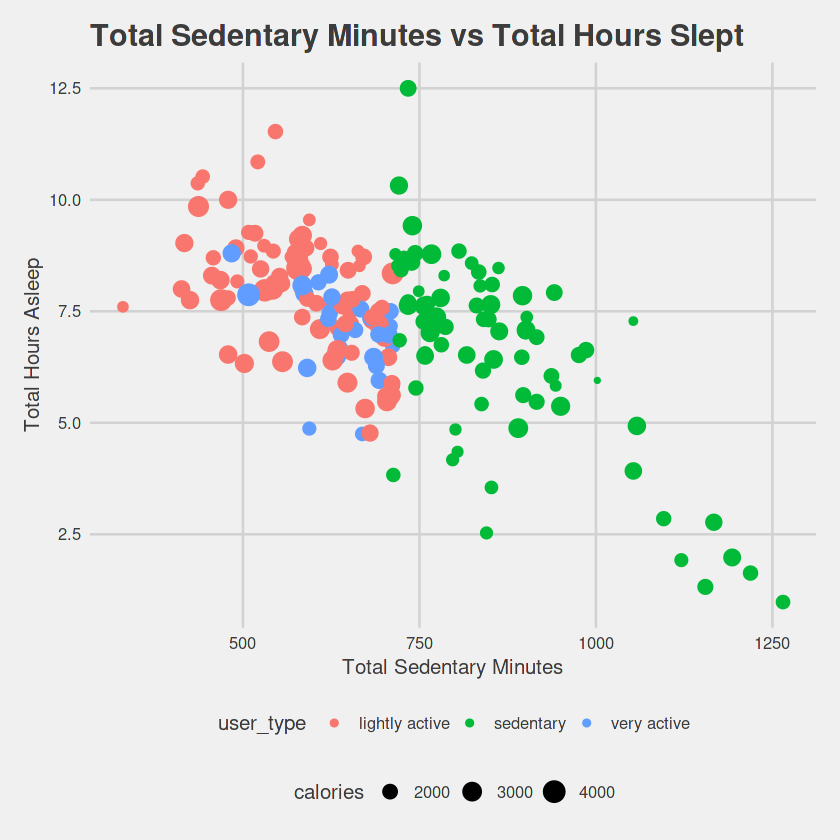

In [26]:
ggplot(data=user_type)+geom_point(mapping=aes(x=sedentary_minutes,y=total_hours_slept,color=user_type,size=calories))+theme_fivethirtyeight()+theme(axis.title=element_text())+labs(title="Total Sedentary Minutes vs Total Hours Slept",x="Total Sedentary Minutes",y="Total Hours Asleep")

This visualization shows the relationship between total sedentary minutes vs hours slept and overall calories burned. We can see that users who have a large amount of sedentary minutes tend to sleep less than users who are fairly active. It's also interesting to note that users with a healthy mix of activity and sleep tend to burn more calories. 


In [27]:
activity_day<-user_type %>%
mutate(day_of_week =weekdays(date))
head(activity_day)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,⋯,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,total_hours_slept,total_hours_in_bed,user_type,day_of_week
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-21,9819,6.34,6.34,0,1.34,0.35,4.65,0,⋯,211,838,1775,1,325,364,5.42,6.07,sedentary,Thursday
2,1503960366,2016-04-24,10039,6.41,6.41,0,2.92,0.21,3.28,0,⋯,238,709,1788,1,430,449,7.17,7.48,very active,Sunday
3,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,⋯,217,712,1947,1,404,425,6.73,7.08,very active,Saturday
4,1503960366,2016-05-11,12770,8.13,8.13,0,2.56,1.01,4.55,0,⋯,251,669,1783,1,285,306,4.75,5.10,very active,Wednesday
5,1644430081,2016-04-29,3176,2.31,2.31,0,0.00,0.00,2.31,0,⋯,120,1193,2498,1,119,127,1.98,2.12,sedentary,Friday
6,1927972279,2016-04-12,678,0.47,0.47,0,0.00,0.00,0.47,0,⋯,55,734,2220,3,750,775,12.50,12.92,sedentary,Tuesday


I wanted to see how daily activity differs depending on the day so I created a new column which references the day of the week Monday,Tuesday etc.


In [28]:
activity_day%>%
group_by(day_of_week,user_type)%>%
summarize(average_steps=mean(total_steps),average_calories=mean(calories))%>%
arrange(-average_steps)



`summarise()` has grouped output by 'day_of_week'. You can override using the `.groups` argument.



day_of_week,user_type,average_steps,average_calories
<chr>,<chr>,<dbl>,<dbl>
Saturday,very active,17787.000,2832.800
Thursday,very active,14660.000,2220.667
Tuesday,very active,14143.500,2104.500
Friday,very active,13348.333,2169.667
Monday,very active,12397.333,2190.333
Wednesday,very active,11675.000,2391.333
Sunday,very active,11214.500,2259.000
Thursday,lightly active,10490.889,2289.667
Monday,lightly active,9832.000,2171.875


Sunday was consistently in the lowest 3 days based on total steps across all three user types. 


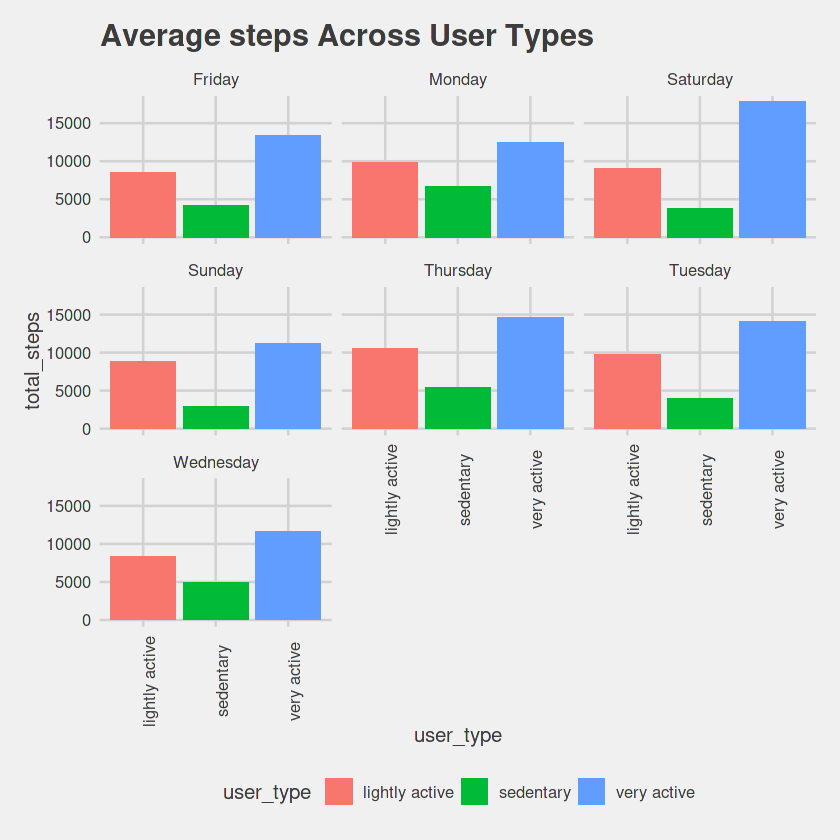

In [29]:
ggplot(data=activity_day)+geom_bar(mapping=aes(x=user_type,y=total_steps,fill=user_type),stat="summary",fun=mean)+facet_wrap("day_of_week")+theme_fivethirtyeight()+theme(axis.title=element_text())+theme(axis.text.x = element_text(angle = 90))+labs(title="Average steps Across User Types")

Sedentary users are getting the least amount of activity across all days where active users aer averaging at least 10,000 steps daily


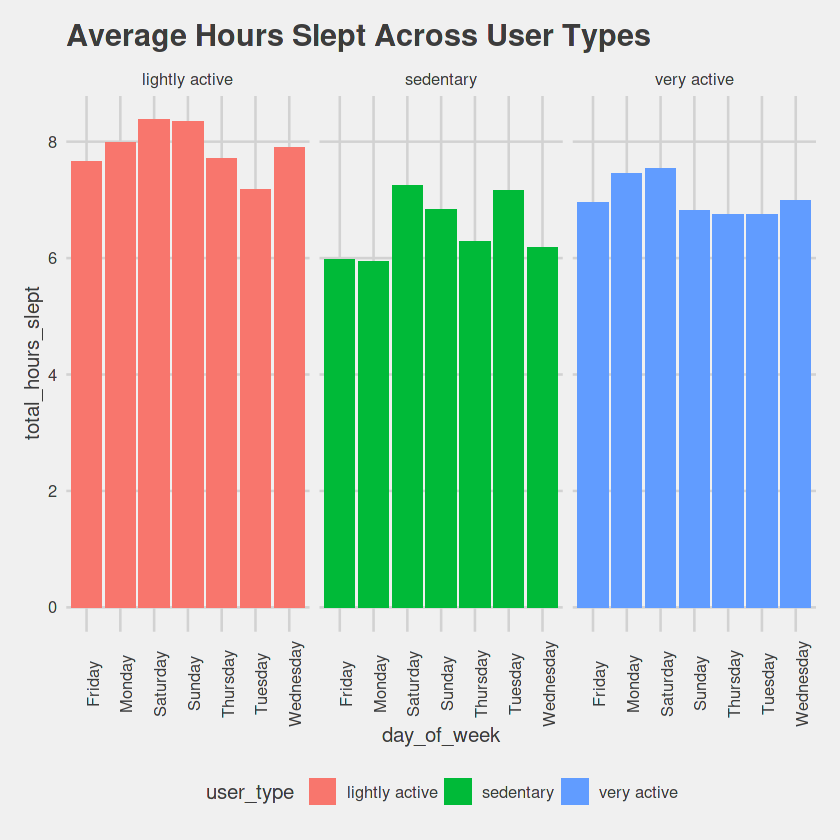

In [30]:
ggplot(data=activity_day)+geom_bar(mapping=aes(y=total_hours_slept,x=day_of_week,fill=user_type),stat="summary",fun=mean)+facet_wrap("user_type")+theme_fivethirtyeight()+theme(axis.title=element_text())+theme(axis.text.x = element_text(angle = 90))+labs(title="Average Hours Slept Across User Types")



Most users are getting the most sleep during the weekend which makes sense.

## **Findings**

![](https://www.smartgeekwrist.com/wp-content/uploads/2017/04/Bellabeat-Leaf-Urban-Review.jpg)

**Mission Statement: Bellabeat empowers women to reconnect with themselves, unleash their inner strengths and be what they were meant to be**


1: Sedentary minutes and light minutes make up over 90% of all total minutes across users. For there being a large amount of fitness brands catering to the very active users, I believe there is a large market of casual users which can be tapped.

2: Any activity is better than zero! Users who were put into the light activity category were more likely to burn more calories, sleep better and be overall more active then users who were put into the sedentary category. What's interesting is that while there was a clear difference between users who were labeled sedentary and lightly active, the difference was less noticeable between lightly active and very active. These lightly active users could be getting their movement through a variety of ways, not just planned exercise. Things like walking to the store, cleaning the house and light movement plays a big part in your total activity minutes!

3: Users were less likely to use the self reporting features. Out of 32 users only 8 were recording weight on their fitness tracker. 

**Recommendations for Bella Beat**:

1. I believe BellaBeat is doing an excellent job of catering to the lifestyle group of fitness users. They already make products that differ from other offerings in the market and look sleek and elegant. My advice would be to branch out into other types of styles and maybe even catering to men as well. There’s a large group of men that would be looking for a change rather than the basic fitness band. Exploring options such as rings, unisex braclets and other jewerly would allow Bella Beat to reach a larger target audience.
1. I think it is important to also focus on the more active user groups. Running marketing campaigns that focus on sleep quality, daily activity and even branching out into nutrition would give users the option to explore their BellaBeat on a deeper level. I believe showcasing health benefits in an overall lifestyle way would do well with their current target audience as well as the potential target audience of other fitness band users. 

**Shortcomings**
1. I would have really liked to have some demographic data on fitness band users to get deep into understanding users' type to analyze the entire market on a deep level.
1. I would like to have some survey response data about current fitness band users to help understand what they want to see differently or which features they currently enjoy.



